In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [27]:
#Read Dataset  
pd.pandas.set_option('display.max_columns',None)
dataset=pd.read_csv('C:\\Users\\HP\\Desktop\\federal-candidatesEDAwk2.csv')
print(dataset.shape)
dataset.head()

(41017, 75)


,id,parliament,year,birth_year,riding_id,votes,percent_votes,num_candidates,birth_yearnan,riding_idnan,votesnan,percent_votesnan,age,day_ordinal,eyear,month,occupationcount,ridingcount,party_rawcount,party_minor_groupcount,type_elxn_General,indigenousorigins_Other,switcher_Switcher,multiple_candidacy_Single,gov_minor_group_Liberal,gov_major_group_Liberal,Not incumbent,Incumbent,missing,M,F,2,Not Out,Out,Other,Lawyer,"Occupations in education, law and social, community and government services","Business, finance and administration occupations",Sales and service occupations,"Natural resources, agriculture and related production occupations",Management occupations,"Occupations in art, culture, recreation and sport",Health occupations,Members of Parliament,"Trades, transport and equipment operators and related occupations",Natural and applied sciences and related occupations,Occupations in manufacturing and utilities,Ontario,Quebec,British Columbia,Alberta,Nova Scotia,Manitoba,Saskatchewan,New Brunswick,Newfoundland and Labrador,Prince Edward Island,Northwest Territories,Yukon,Nunavut,Québec,Not acclaimed,Acclaimed,Conservative,Liberal,Third_Party,CCF_NDP,Independent,Reform_Alliance,Bloc,Progressive,Liberal Party of Canada,Progressive Conservative Party,Conservative Party of Canada,Not elected
0,26093,1,1867,1815.0,35052.0,7.769379,3.262924,4,0,1,0,0,52.0,3,1867,8,1195.0,228,18,384,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1,13011,1,1867,1824.0,35052.0,7.775276,3.268822,4,0,1,0,0,43.0,3,1867,8,1195.0,228,129,129,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
2,27974,1,1867,1908.0,35052.0,7.675082,3.168628,4,1,1,0,0,-41.0,3,1867,8,3940.0,228,848,3780,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
3,18040,1,1867,1805.0,35052.0,7.124478,4.161786,2,0,1,0,0,62.0,3,1867,8,3940.0,72,3373,11645,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1798,1,1867,1829.0,35052.0,8.308446,4.605170,1,0,1,1,0,38.0,3,1867,8,1013.0,120,385,11645,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [28]:
print(dataset['parliament'].dtypes)
features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O' and feature !='elected']
#print(dataset[feature].isnull().sum())
for feature in features:
    np.array(dataset[feature], dtype=np.float64)    
     #.astype(np.float64)
    

int64


In [29]:

#Feature scaling
feature_scale=[feature for feature in dataset.columns if feature not in ['Not elected','id']]
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])
MinMaxScaler(copy=True,feature_range=(0,1))


MinMaxScaler()

In [30]:
#Feature transformation
print(scaler)
print(dataset.columns)
data=pd.concat([dataset[['id','Not elected']].reset_index(drop=True),pd.DataFrame(scaler.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)
data.to_csv('C:\\Users\\HP\\Desktop\\train.csv',index=False)




MinMaxScaler()
Index(['id', 'parliament', 'year', 'birth_year', 'riding_id', 'votes',
       'percent_votes', 'num_candidates', 'birth_yearnan', 'riding_idnan',
       'votesnan', 'percent_votesnan', 'age', 'day_ordinal', 'eyear', 'month',
       'occupationcount', 'ridingcount', 'party_rawcount',
       'party_minor_groupcount', 'type_elxn_General',
       'indigenousorigins_Other', 'switcher_Switcher',
       'multiple_candidacy_Single', 'gov_minor_group_Liberal',
       'gov_major_group_Liberal', 'Not incumbent', 'Incumbent', 'missing', 'M',
       'F', '2', 'Not Out', 'Out', 'Other', 'Lawyer',
       'Occupations in education, law and social, community and government services',
       'Business, finance and administration occupations',
       'Sales and service occupations',
       'Natural resources, agriculture and related production occupations',
       'Management occupations',
       'Occupations in art, culture, recreation and sport',
       'Health occupations', 'Members of 

In [31]:
#feature selection

pd.pandas.set_option('display.max_columns',None)
dataset=pd.read_csv('C:\\Users\\HP\\Desktop\\train.csv')
dataset.head()
Y=dataset[['Not elected']]
X=dataset.drop(['id','Not elected'],axis=1)


In [32]:
#selection model
feature_sel_model=SelectFromModel(Lasso(alpha=.005,random_state=0))
feature_sel_model.fit(X,Y)
feature_sel_model.get_support()



array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [34]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression()
logit_reg.fit(X_train,Y_train)
Y_pred = logit_reg.predict(X_test)
Y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix


print("accuracy is:",accuracy_score(Y_test,Y_pred))
print("precision score:",precision_score(Y_test,Y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,Y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,Y_pred,average='macro'))

accuracy is: 0.9971964895173087
precision score: 0.9971313404871214
recall_score: 0.9959679305884032
f1 score: 0.9965474771206685


In [36]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [1, 10, 100, 1000],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
grid_search = GridSearchCV(estimator = logit_reg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)

In [37]:
accuracy = grid_search.best_score_
print(accuracy)

0.9972571902201185


In [38]:
# SVM

from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,Y_train)
Y_pred = svm_model.predict(X_test)
print("accuracy is:",accuracy_score(Y_test,Y_pred))
confusion_matrix(Y_test,Y_pred)

accuracy is: 0.9965870307167235


array([[2307,   21],
       [   7, 5869]], dtype=int64)

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
y_pred = dt_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.9971964895173087
precision score: 0.9961064614533663
recall_score: 0.9970054084528128
f1 score: 0.9965546364791091


[Text(0.4689703808180536, 0.96875, 'X[7] <= 0.5\ngini = 0.4\nsamples = 32813\nvalue = [9055, 23758]'),
 Text(0.056417489421720736, 0.90625, 'X[5] <= 0.725\ngini = 0.009\nsamples = 9007\nvalue = [8968, 39]'),
 Text(0.045133991537376586, 0.84375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.06770098730606489, 0.84375, 'X[11] <= 0.365\ngini = 0.008\nsamples = 9004\nvalue = [8968, 36]'),
 Text(0.022566995768688293, 0.78125, 'X[5] <= 0.924\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.011283497884344146, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.03385049365303244, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11283497884344147, 0.78125, 'X[4] <= 0.646\ngini = 0.008\nsamples = 9001\nvalue = [8967, 34]'),
 Text(0.056417489421720736, 0.71875, 'X[5] <= 0.923\ngini = 0.052\nsamples = 597\nvalue = [581, 16]'),
 Text(0.045133991537376586, 0.65625, 'X[6] <= 0.125\ngini = 0.364\nsamples = 67\nvalue = [51, 16]'),
 Text(0.03385049365303244, 0.59375, 'gi

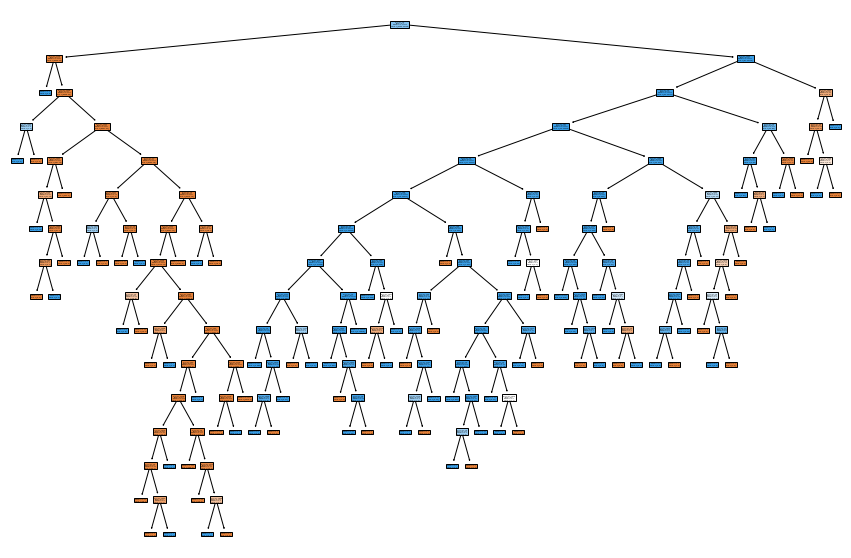

In [41]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True)

In [42]:
path = dt_model.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 2.02710801e-05 2.02743778e-05 2.02809992e-05
 2.02849013e-05 2.61293626e-05 2.93873073e-05 2.95522192e-05
 2.96049911e-05 2.97984877e-05 2.98896544e-05 3.03067918e-05
 3.04639412e-05 3.06909440e-05 4.06343014e-05 4.06343014e-05
 4.46002049e-05 4.53316326e-05 4.57135891e-05 5.07928768e-05
 5.28971531e-05 5.75652604e-05 5.77434810e-05 6.00353269e-05
 6.00929810e-05 6.15671234e-05 7.47140596e-05 9.93180665e-05
 1.05088711e-04 1.30687084e-04 1.59225319e-04 2.34324792e-04
 2.72580354e-04 4.89874945e-04 1.14485996e-03 3.91959884e-01]


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.001)
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(n_estimators=100)
random.fit(X_train,Y_train)
y_pred=random.predict(X_test)
y_pred

In [ ]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

In [ ]:
confusion_matrix(Y_test,y_pred)

In [ ]:
#random forest shows max accuracy 99.8